In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd drive


/content/drive


In [ ]:
cd My Drive

/content/drive/My Drive


In [ ]:
INPUT_SIZE = (256, 256)
mapping = {'normal': 0, 'bacterial': 1, 'viral': 2}

Load x_train, y_train

In [ ]:
x_normal = np.load('/content/drive/My Drive/data/x_normal.npy')
y_normal = np.load('/content/drive/My Drive/data/y_normal.npy')
x_viral = np.load('/content/drive/My Drive/data/x_viral.npy')
y_viral = np.load('/content/drive/My Drive/data/y_viral.npy')
x_bacterial = np.load('/content/drive/My Drive/data/x_bacterial.npy')
y_bacterial = np.load('/content/drive/My Drive/data/y_bacterial.npy')
x_covid=np.load('/content/drive/My Drive/data/x_covid.npy')
y_covid=np.load('/content/drive/My Drive/data/y_covid.npy')

In [ ]:
import random

In [ ]:
X=[]
y=[]

nums = random.sample(range(0, 1504), 550)
for i in nums:
  X.append(x_normal[i])
  y.append(0)
nums = random.sample(range(0, 1504), 250)
for i in nums:
  X.append(x_bacterial[i])
  y.append(1)
nums = random.sample(range(0, 1504), 150)
for i in nums:
  X.append(x_viral[i])
  y.append(1)
nums = random.sample(range(0, 239), 150)
for i in nums:
  X.append(x_covid[i])
  y.append(1)    

In [ ]:

X=np.asarray(X)
y=np.asarray(y)

Model for hist

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [ ]:
from keras.layers import GlobalMaxPooling2D

In [ ]:
model = Sequential()
model.add(layers.Conv2D(filters=8,kernel_size=(3,3),input_shape=(256,256,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=32,kernel_size=(1,1),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=64,kernel_size=(1,1),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=128,kernel_size=(1,1),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(layers.Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=256,kernel_size=(1,1),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.Conv2D(filters=3,kernel_size=(3,3),strides=1,padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Encodey_train

In [ ]:
'''from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y=np.asarray(y)
y=y.reshape(-1,1)
yfunc=enc.fit(y)'''

"from sklearn.preprocessing import OneHotEncoder\nenc = OneHotEncoder(handle_unknown='ignore')\ny=np.asarray(y)\ny=y.reshape(-1,1)\nyfunc=enc.fit(y)"

In [ ]:
#y_binary=enc.transform(y).toarray()

In [ ]:
#y_binary

In [ ]:
#y_test_binary=enc.transform(y_test).toarray()

Reshape x_train for giving input to conv layers

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=32)
mc = ModelCheckpoint('darkcovidnetmodel.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model.fit(X,y,batch_size=16,epochs=100,callbacks=[es,mc],validation_split=0.2)


Train on 880 samples, validate on 220 samples
Epoch 1/100
880/880 [==============================] - 107s 122ms/step - loss: 0.4536 - accuracy: 0.8648 - val_loss: 0.0033 - val_accuracy: 1.0000

Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to darkcovidnetmodel.h5
Epoch 2/100
880/880 [==============================] - 106s 121ms/step - loss: 0.2017 - accuracy: 0.9352 - val_loss: 0.0310 - val_accuracy: 1.0000

Epoch 00002: val_accuracy did not improve from 1.00000
Epoch 3/100
880/880 [==============================] - 104s 118ms/step - loss: 0.1456 - accuracy: 0.9466 - val_loss: 0.0153 - val_accuracy: 1.0000

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/100
880/880 [==============================] - 105s 119ms/step - loss: 0.1327 - accuracy: 0.9511 - val_loss: 0.5859 - val_accuracy: 0.7727

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/100
880/880 [==============================] - 105s 120ms/step - loss: 0.0921 - accuracy: 0.96

In [ ]:
# list all data in history
print(history.history['accuracy'])

[0.86477274, 0.9352273, 0.9465909, 0.95113635, 0.96590906, 0.9784091, 0.95681816, 0.9590909, 0.99204546, 0.98068184, 0.9875, 0.9943182, 0.9977273, 0.9931818, 0.97727275, 0.9522727, 0.98977274, 0.99204546, 0.9931818, 0.9977273, 0.99886364, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
import pickle
with open('BinaryDCN6.pkl', 'wb') as f:
  pickle.dump(history.history, f, pickle.HIGHEST_PROTOCOL)

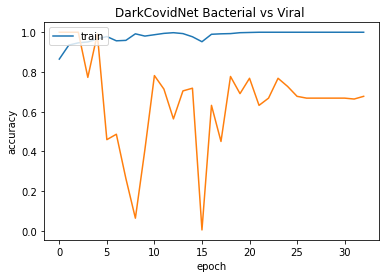

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DarkCovidNet Bacterial vs Viral ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

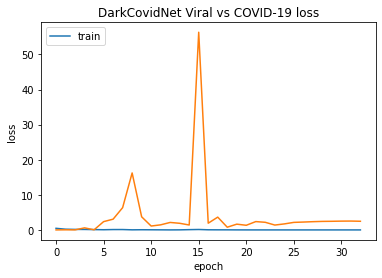

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DarkCovidNet Viral vs COVID-19 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

save model

In [ ]:
model_json = model.to_json()
with open("binarydarkcovidnet_norvsinf.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("binarydarkcovidnet_norvsinf.h5")

load model

In [ ]:
from tensorflow.keras.models import model_from_json
json_file = open('binarydarkcovidnet_norvsinf.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("binarydarkcovidnet_norvsinf.h5")

In [ ]:
testacc=[]
spec= []
sens=[]


load x_test, y_test

In [ ]:
n=np.zeros(shape=(100,1))
c=np.ones(shape=(150,1))



x_test=np.concatenate((x_normal[1000:1050],x_bacterial[1000:1050],x_viral[1000:1050],x_covid[175:225]))
y_test=np.concatenate((n[0:50],c[0:150]))


In [ ]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
_, test_acc = loaded_model.evaluate(x_test, y_test, verbose=0)

In [ ]:
print('accuracy: ',test_acc,)
print('loss:',_)

accuracy:  0.85
loss: 0.9531159710884094


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
sample_labels = []
for i in y_pred:
  if i>0.5:
    sample_labels.append(1)
  else :
    sample_labels.append(0) 

In [ ]:
import sklearn
test_acc=sklearn.metrics.accuracy_score(y_test, sample_labels)

In [ ]:
test_acc

0.85

-----------------------------------
TP :  48
TN :  122
FP :  28
FN :  2
sensitivity :  0.96
specificity :  0.8133333333333334


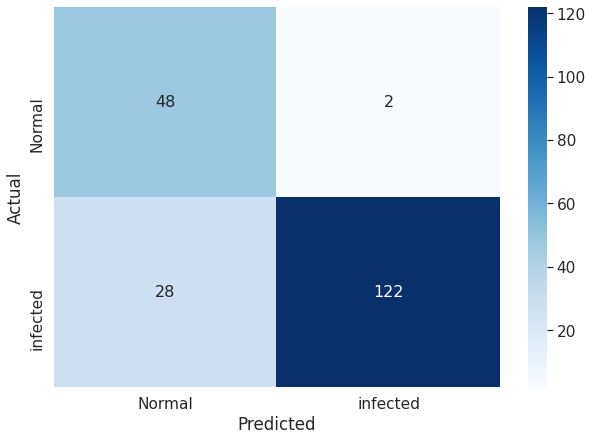

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,sample_labels)
import seaborn as sns
df_cm = pd.DataFrame(cm, columns=['Normal','infected'], index = ['Normal','infected'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='d')




fp=cm[1][0]
fn=cm[0][1]
tp=cm[0][0]
tn=cm[1][1]
print("-----------------------------------")
print("TP : ",tp)
print("TN : ",tn)
print("FP : ",fp)
print("FN : ",fn)
print("sensitivity : ",tp/(float)((tp+fn)))
print("specificity : ",tn/(float)((tn+fp)))
sn=tp/(float)((tp+fn))
sp=tn/(float)((tn+fp))


In [ ]:
testacc

[0.7833333333333333,
 0.775,
 0.79,
 0.9,
 0.84,
 0.87,
 0.8375,
 0.7625,
 0.7833333333333333,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.8666666666666667,
 0.85]

In [ ]:
testacc.append(test_acc)
sens.append(sn)
spec.append(sp)


In [ ]:
print(sens,spec)

[1.0, 0.95, 0.95, 0.95, 0.975, 1.0, 1.0, 1.0, 1.0, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96] [0.675, 0.7166666666666667, 0.75, 0.8833333333333333, 0.75, 0.8375, 0.7833333333333333, 0.6833333333333333, 0.675, 0.716666666667, 0.716666666667, 0.716666666667, 0.716666666667, 0.716666666667, 0.716666666667, 0.716666666667, 0.716666666667, 0.825, 0.8, 0.8133333333333334]


In [ ]:
len(testacc)

20

In [ ]:
len(sens)

20

In [ ]:
dic={'test_acc':testacc, 'sens':sens,'spec':spec}

In [ ]:
import pickle
with open('Boxplot_norvsinf_darkcovidnet.pkl', 'wb') as f:
  pickle.dump(dic, f, pickle.HIGHEST_PROTOCOL)

Predicting a sample image

In [ ]:
img = cv2.imread('/content/drive/My Drive/data/train/viral/viral0148.jpeg',0)
img = cv2.resize(img,(256,256))
img=np.uint8(cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX))
img = cv2.equalizeHist(img)
img = np.power(img, gamma) 

In [ ]:
img=np.expand_dims(img,axis=(0,3))

In [ ]:
img.shape

In [ ]:
pred1=loaded_model.predict(img)
pred1_label=enc.inverse_transform(pred1)
for key in mapping.keys():
  if(mapping[key]==pred1_label[0][0]):
    print(key)

Predicting Test samples and confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

